In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm
from statsmodels.graphics.factorplots import interaction_plot

In [63]:
df = pd.read_csv('Fever.csv')

In [64]:
df1 = df.copy()

In [5]:
df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [6]:
df.shape

(36, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [8]:
df.describe()

,A,B,Volunteer,Relief
count,36.000000,36.000000,36.000000,36.000000
mean,2.000000,2.000000,2.500000,7.183333
std,0.828079,0.828079,1.133893,3.272090
min,1.000000,1.000000,1.000000,2.300000
25%,1.000000,1.000000,1.750000,4.675000
50%,2.000000,2.000000,2.500000,6.000000
75%,3.000000,3.000000,3.250000,9.325000
max,3.000000,3.000000,4.000000,13.500000


## Formulating the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

**Null Hypothesis $H_0$** : The mean hours of relief provided by the active ingredient A is same with different levels of the ingredient.

**Alternate Hypothesis $H_A$** : The mean hours of relief provided by the active ingredient A is different in at-least one level of the ingredient.

## One Way Anova of variable 'A' w.r.t variable 'B'

In [9]:
df.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [7]:
df.Relief.value_counts()

9.1     2
8.7     2
4.6     2
5.8     1
4.9     1
4.5     1
5.5     1
9.0     1
10.5    1
5.2     1
6.2     1
13.5    1
10.6    1
13.0    1
4.4     1
10.1    1
8.9     1
9.9     1
2.3     1
2.7     1
5.3     1
4.7     1
5.9     1
6.1     1
9.4     1
13.2    1
9.3     1
2.4     1
4.2     1
5.7     1
13.3    1
4.8     1
2.5     1
Name: Relief, dtype: int64

## One-way ANOVA with the variable 'A'.

In [30]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


In [31]:
print(model.f_pvalue)

4.5782418430432463e-07


In [34]:
w, p_value = stats.shapiro(model.resid)
print('W: {}\npvalue: {}'.format(w,p_value))

W: 0.9256583452224731
pvalue: 0.01852050982415676


In [38]:
#D'Agostino's K^2
stat, p = stats.normaltest(model.resid)
print('statistic: {}\npvalue: {}'.format(stat,p_value))

statistic: 1.294254392349384
pvalue: 0.01852050982415676


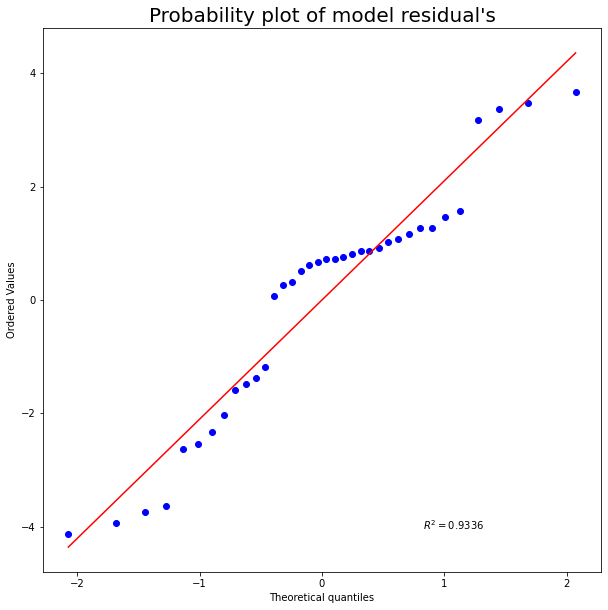

In [39]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [43]:
stats.levene(df['Relief'][df['A'] == 1],
             df['Relief'][df['A'] == 2],
             df['Relief'][df['A'] == 3])

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

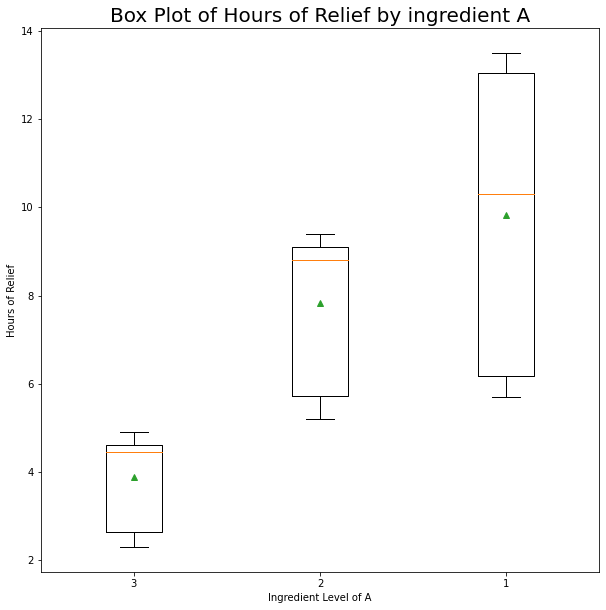

In [45]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Hours of Relief by ingredient A", fontsize= 20)
ax.set

data = [df['Relief'][df['A'] == 1],
        df['Relief'][df['A'] == 2],
        df['Relief'][df['A'] == 3]]

ax.boxplot(data,
           labels= ['3', '2', '1'],
           showmeans= True)

plt.xlabel("Ingredient Level of A")
plt.ylabel("Hours of Relief")

plt.show()

# 1.3)

## **Formulating the hypothesis of the One-way ANOVA of ingredient 'B' with the data on the hours of 'Relief'**

**Null Hypothesis $H_0$** : The mean hours of relief provided by the active ingredient B is same with different levels of the ingredient.

**Alternate Hypothesis $H_A$** : The mean hours of relief provided by the active ingredient B is different in at-least one level of the ingredient.

## One-way ANOVA with the variable 'B'.

In [47]:
formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


In [48]:
print(model.f_pvalue)

0.0013497704987694903


**Conclusion**: Since the p value is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is a difference in the mean hours of relief provided by the levels of ingredient 'B' and is different in at-least one level of the ingredient.

In [49]:
w, p_value = stats.shapiro(model.resid)
print('W: {}\npvalue: {}'.format(w,p_value))

W: 0.9333563446998596
pvalue: 0.0316743329167366


In [50]:
#D'Agostino's K^2
stat, p = stats.normaltest(model.resid)
print('statistic: {}\npvalue: {}'.format(stat,p_value))

statistic: 2.894395758810686
pvalue: 0.0316743329167366


In [52]:
stats.levene(df['Relief'][df['B'] == 1],
             df['Relief'][df['B'] == 2],
             df['Relief'][df['B'] == 3])

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

## 1.4)

In [53]:
df.A = pd.Categorical(df.A)

In [54]:
df.B = pd.Categorical(df.B)

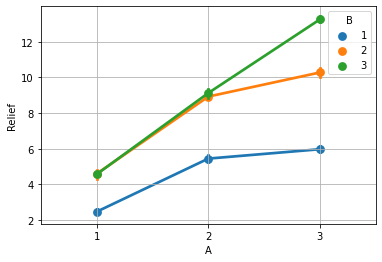

In [55]:
sns.pointplot(x='A', y='Relief', data=df, hue='B')
#sns.pointplot(x='B', y='Relief', data=df, hue='A')
plt.grid()
plt.show()

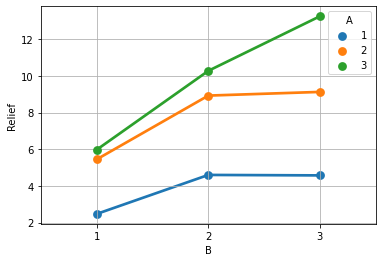

In [56]:
sns.pointplot(x='B', y='Relief', data=df, hue='A', ci=None)
#sns.pointplot(x='A', y='Relief', data=df, hue='B', ci=None)
plt.grid()
plt.show()

## 1.5)

## **Formulating the hypothesis of the Two-way ANOVA of ingredient 'A' & 'B' with the data on the hours of 'Relief'**

**Null Hypothesis $H_0$** : The mean hours of relief provided by the interaction between active ingredients A and B is same with different levels of the combination.

**Alternate Hypothesis $H_A$** : The mean hours of relief provided by the interaction between active ingredients A and B is different in at-least one level of the combination of the ingredients.

In [59]:
formula = 'Relief ~ C(A) + C(B) + C(A)*C(B)'
model = ols(formula, df).fit()
anova_table = anova_lm(model)
print(anova_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [60]:
w, p_value = stats.shapiro(model.resid)
print('W: {}\npvalue: {}'.format(w,p_value))

W: 0.965090274810791
pvalue: 0.30688926577568054


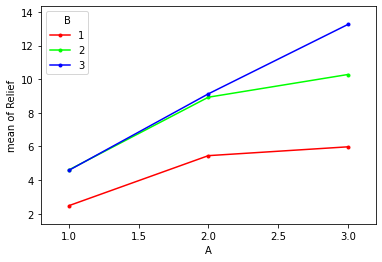

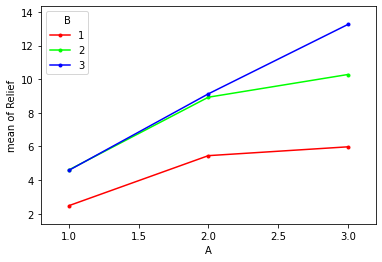

In [65]:
interaction_plot(df1['A'], df1['B'], df1['Relief'])

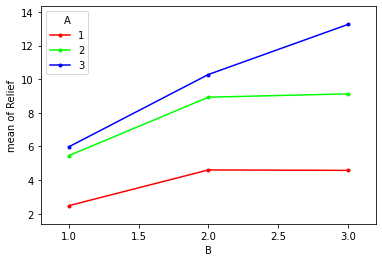

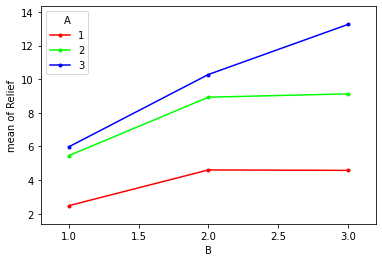

In [66]:
interaction_plot(df1['B'], df1['A'], df1['Relief'])

# 1.6